In [3]:
import sys
import sklearn
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Building a DNN Image Classifier using Keras and Tensorflow
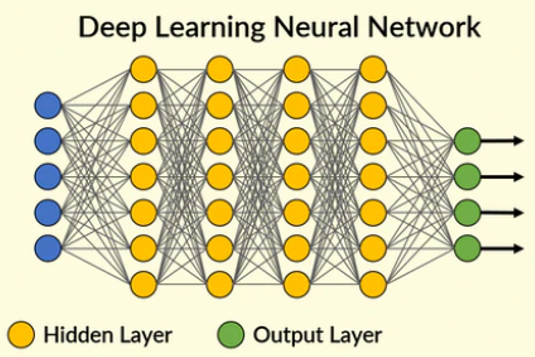




#Enabling and testing the GPU
First, you'll need to enable GPUs for the notebook:

Navigate to Edit→Notebook Settings
select GPU from the Hardware Accelerator drop-down
Next, we'll confirm that we can connect to the GPU with tensorflow:

In [1]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#  Fashion MNIST data details

https://www.tensorflow.org/datasets/catalog/fashion_mnist



<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

# Load Fashion MNIST Dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255 (scaling image input)


To reduce this we can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

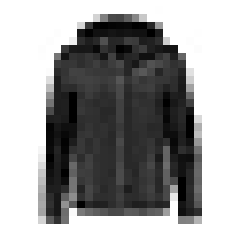

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train #labels

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The train dataset has 55000 images, validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


Let's take a look at a sample of the images in the dataset:

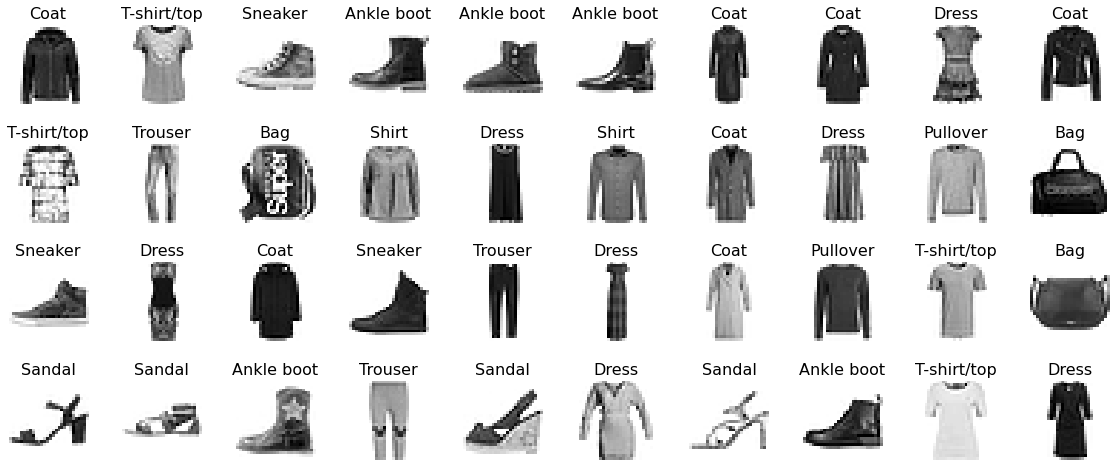

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows* 2)) #amplify the size of the figure by twice the value
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Build the Network using Sequential API

Simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially.

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) #Input layer==Flatten--> converts each input image into a 1D array
model.add(keras.layers.Dense(200, activation="relu")) #Dense/ Hidden layer-1 with 300 neurons, ReLU activation
model.add(keras.layers.Dense(100, activation="relu")) #Dense/ Hidden layer-2 with 100 neurons, ReLU activation
model.add(keras.layers.Dense(10, activation="softmax"))#Dense Output layer with 10 neurons, softmax activation

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters

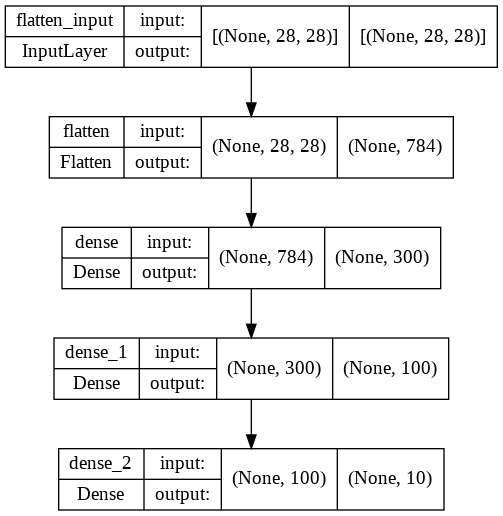

In [16]:
keras.utils.plot_model(model, "fashion_mnist_model.png", show_shapes=True)

# Call the compile() method to specify the loss function and the optimizer to use.

In [24]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

#Check other losses, optimizers, io metrics

#https://keras.io/losses, https://keras.io/optimizers, and https://keras.io/metrics.

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

# Training on train data and evaluating on validation data

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7046 - accuracy: 0.7667 - val_loss: 0.5453 - val_accuracy: 0.7980
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4857 - accuracy: 0.8310 - val_loss: 0.4978 - val_accuracy: 0.8136
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4406 - accuracy: 0.8447 - val_loss: 0.4480 - val_accuracy: 0.8436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8547 - val_loss: 0.3958 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8601 - val_loss: 0.4101 - val_accuracy: 0.8578
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8664 - val_loss: 0.3674 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8704 - val_loss: 0.3733 - val_accuracy:

In [26]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [27]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

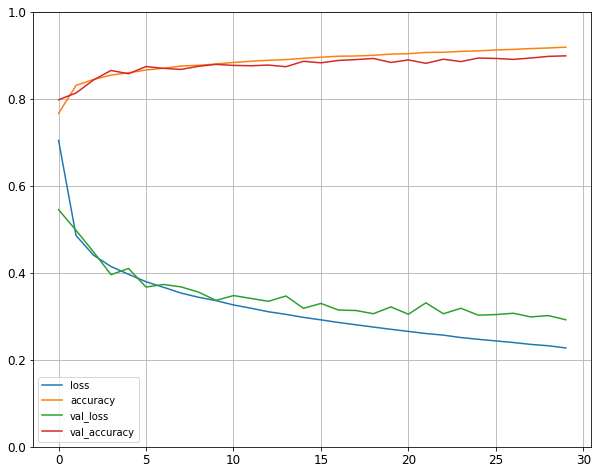

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8813


[0.324802964925766, 0.8812999725341797]

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred #print the predictions of the model

array([9, 2, 1])

In [34]:
np.array(class_names)[y_pred] #print the predicted classes

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new #print the actual labels for the first 3 observations

array([9, 2, 1], dtype=uint8)

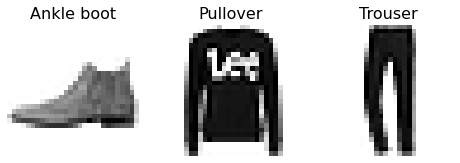

In [37]:
plt.figure(figsize=(8, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=16)
plt.show()

# Saving and Restoring

To save a pre-trained model or its weights, you need to install h5py. The h5py package is a Pythonic interface to the HDF5 binary data format.It lets you store huge amounts of numerical data such as the pre-trained model or just the model weights. For more information check the url: https://www.h5py.org/

You can install h5py in one of the following ways:

conda install h5py (using anaconda prompt)

!pip install h5py (using jupyter notebook)

In [38]:
import h5py
print(h5py.__version__) ##printing the h5py version installed on my computer

3.1.0


In [39]:
model.save("DNN_clf.h5") ## save the pre-trained model for later use

In [40]:
model.save_weights("DNN_weights.ckpt") ##you can also save weights only
model.load_weights("DNN_weights.ckpt") # load weights only

In [41]:
#Load the pre-trained model
dnn_model = keras.models.load_model("DNN_clf.h5")

In [42]:
X_newer = X_test[:10]
y_probs = dnn_model.predict(X_newer)
y_probs.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.11, 0.  , 0.02, 0.  , 0.01, 0.  , 0.86, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_preds = np.argmax(dnn_model.predict(X_newer), axis=-1)
y_preds #print the predictions of the model

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [44]:
Y_newer = y_test[:10]
Y_newer

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [45]:
np.array(class_names)[y_preds] #print the predicted classes

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

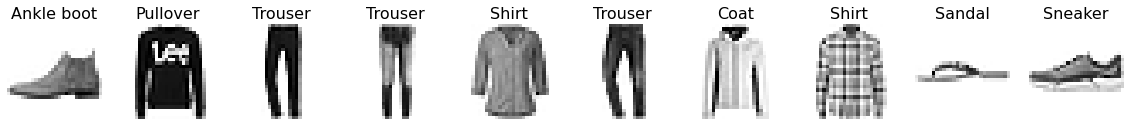

In [46]:
plt.figure(figsize=(20,12))
for index, image in enumerate(X_newer):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Evaluate the results of multi-classification using confusion matrix

In [47]:
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

pred_all = np.argmax(dnn_model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, pred_all)
cm ###multi classification, multiple classes (0-9)


array([[771,   1,  21,  23,   4,   1, 171,   0,   7,   1],
       [  4, 965,   0,  24,   4,   0,   3,   0,   0,   0],
       [ 10,   0, 760,  21, 117,   1,  91,   0,   0,   0],
       [ 14,   5,  11, 903,  32,   0,  31,   0,   4,   0],
       [  0,   1,  63,  32, 840,   0,  62,   0,   2,   0],
       [  0,   0,   0,   1,   0, 961,   0,  24,   2,  12],
       [ 78,   1,  64,  28,  69,   0, 751,   0,   9,   0],
       [  0,   0,   0,   0,   0,  21,   0, 963,   0,  16],
       [  3,   0,   2,   9,   7,   2,   9,   6, 962,   0],
       [  0,   0,   0,   0,   0,  10,   1,  52,   0, 937]])

Text(0.5, 257.44, 'Predicted label')

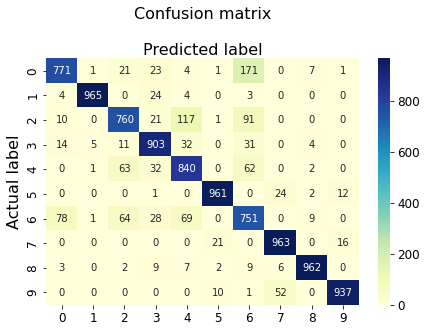

In [48]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cls_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [49]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred_all, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.83      0.76      0.79      1000
           3       0.87      0.90      0.88      1000
           4       0.78      0.84      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.67      0.75      0.71      1000
           7       0.92      0.96      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Micro-averaged F1-score (Micro F1)

Calculated by considering the total TP, total FP and total FN of the model. It does not consider each class individually. It gives the overall global value.

For example, calculate the total TP, total TN and total FN for all the classes. Then, use the precision and recall formulas to calculate the values for overall precision, recall and F1 score.


# Macro-averaged F1-score (Macro F1)

Calculates metrics for each class individually and then takes unweighted mean of the measures. For example, calculate the F1 score for class 0, class 1 and class 2 separately and then calculate the overall mean (F1_score for class1 + F1_score for class2+ F1_score for class3)/3.

# Weighted F1-score (Weighted F1)

It takes a weighted mean of the measures. The weights for each class are the total number of samples of that class.

For example, if we have 5 samples from class1, 10 samples from class2 and 15 samples from class3, the weighted F1 is given by:

Weighted F1 = [(F1_score for class1 * 5) + (F1_score for class2 * 10) +(F1_score for class3 * 15)]/ (5+10+15)


Reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826



In [50]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred_all, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred_all, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred_all, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred_all, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred_all, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred_all, average='weighted')))




Accuracy: 0.88

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-score: 0.88
